In [1]:
using MultivariateStats, RDatasets, Plots

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


In [3]:
iris = dataset("datasets", "iris");

In [4]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [18]:
Xtr = convert(Array,iris[1:2:end,1:4])';
Xtr_labels = convert(Array,iris[1:2:end,5]);

In [27]:
Xtr

4×75 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 5.1  4.7  5.0  4.6  4.4  5.4  4.8  5.8  …  6.3  6.0  6.7  5.8  6.7  6.3  6.2
 3.5  3.2  3.6  3.4  2.9  3.7  3.0  4.0     3.4  3.0  3.1  2.7  3.3  2.5  3.4
 1.4  1.3  1.4  1.4  1.4  1.5  1.4  1.2     5.6  4.8  5.6  5.1  5.7  5.0  5.4
 0.2  0.2  0.2  0.3  0.2  0.2  0.1  0.2     2.4  1.8  2.4  1.9  2.5  1.9  2.3

In [21]:
Xte = convert(Array,iris[2:2:end,1:4])';
Xte_labels = convert(Array,iris[2:2:end,5]);

In [22]:
M = fit(PCA, Xtr; maxoutdim=3)

PCA(indim = 4, outdim = 3, principalratio = 0.9957325846529407)

In [23]:
Yte = transform(M, Xte)

3×75 Array{Float64,2}:
  2.72714    2.75491     2.32396   …  -1.92047   -1.74161   -1.37706
 -0.230916  -0.406149    0.646374      0.246554   0.127625  -0.280295
  0.253119   0.0271266  -0.230469     -0.180044  -0.123165  -0.314992

In [24]:
Xr = reconstruct(M, Yte)

4×75 Array{Float64,2}:
 4.86449  4.61087   5.40782   5.00775   …  6.79346  6.58825  6.46774  5.94384
 3.04262  3.08695   3.89061   3.39069      3.20785  3.13416  3.03873  2.94737
 1.46099  1.48132   1.68656   1.48668      5.91124  5.39197  5.25542  5.02469
 0.10362  0.229519  0.421233  0.221041     2.28224  1.99665  1.91243  1.91901

In [25]:
setosa = Yte[:,Xte_labels.=="setosa"]
versicolor = Yte[:,Xte_labels.=="versicolor"]
virginica = Yte[:,Xte_labels.=="virginica"]

3×25 Array{Float64,2}:
 -1.4126    -1.95359   -3.35517   …  -1.92047   -1.74161   -1.37706
 -0.556727  -0.133821   0.692925      0.246554   0.127625  -0.280295
 -0.214115  -0.075898   0.293002     -0.180044  -0.123165  -0.314992

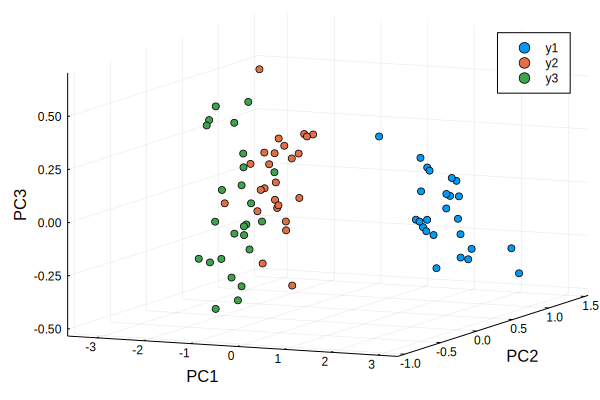

In [26]:
p = scatter(setosa[1,:],setosa[2,:],setosa[3,:],marker=:circle,linewidth=0)
scatter!(versicolor[1,:],versicolor[2,:],versicolor[3,:],marker=:circle,linewidth=0)
scatter!(virginica[1,:],virginica[2,:],virginica[3,:],marker=:circle,linewidth=0)
plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3")